In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Webscrapping Wikipedia table to get the SP500 components
page = requests.get("https://en.wikipedia.org/wiki/Swiss_Market_Index")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table', class_="wikitable sortable")

In [3]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Rank,Name,Industry,Ticker,Canton,Weighting in %
0,1,Nestlé SA,Food,NESN.SW,Vaud,19[1]
1,2,Roche Holding AG,Pharmacy,ROG.SW,Basel,17[1]
2,3,Novartis International AG,Pharmacy,NOVN.SW,Basel,17[1]
3,4,Compagnie Financière Richemont SA,Luxury Goods,CFR.SW,Geneva,7[1]
4,5,Zurich Insurance Group AG,Insurance,ZURN.SW,Zurich,6[1]
5,6,UBS Group AG,Banks,UBSG.SW,Zurich/Basel,5[1]
6,7,ABB Ltd,Electrical equipment,ABBN.SW,Zurich,4[1]
7,8,Lonza Group AG,Chemistry,LONN.SW,Basel,4[1]
8,9,Sika AG,Chemistry,SIKA.SW,Zug,3[1]
9,10,Alcon Inc,Pharmacy,ALC.SW,Fribourg,3[1]


In [4]:
# Get the data for the stock
index_list = wiki['Ticker'].tolist()
index_list.append('^SSMI')

In [5]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/21 [00:00<?, ?it/s]

In [6]:
# Configuration of different parameters of the notebook
ticker = '^SSMI'
year = '2024'

In [7]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-11-09,1378.900024,1389.000000,1375.300049,1387.099976,1387.099976,0
1990-11-12,1388.099976,1408.099976,1388.099976,1407.500000,1407.500000,0
1990-11-13,1412.199951,1429.400024,1411.400024,1415.199951,1415.199951,0
1990-11-14,1413.599976,1413.599976,1402.099976,1410.300049,1410.300049,0
1990-11-15,1410.599976,1416.699951,1405.099976,1405.699951,1405.699951,0
1990-11-16,1405.699951,1407.400024,1389.400024,1395.199951,1395.199951,0
1990-11-19,1395.599976,1417.900024,1395.599976,1416.000000,1416.000000,0
1990-11-20,1414.800049,1415.000000,1404.699951,1405.800049,1405.800049,0
1990-11-21,1405.599976,1405.599976,1396.699951,1398.400024,1398.400024,0


In [8]:
# Check DataFrame tail
stock_ticker.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-28,11732.830078,11740.679688,11687.139648,11730.429688,11730.429688,26562000
2024-04-02,11730.429688,11762.559570,11582.000000,11595.000000,11595.000000,24187800
2024-04-03,11613.240234,11629.429688,11582.330078,11616.870117,11616.870117,25809300
2024-04-04,11633.879883,11693.570312,11616.459961,11691.129883,11691.129883,24405100
2024-04-05,11543.309570,11548.309570,11480.870117,11495.790039,11495.790039,25943200
2024-04-08,11501.709961,11561.379883,11487.410156,11547.139648,11547.139648,19994600
2024-04-09,11525.030273,11577.759766,11486.669922,11506.040039,11506.040039,19861400
2024-04-10,11558.889648,11559.629883,11404.389648,11495.209961,11495.209961,24495300
2024-04-11,11492.070312,11537.570312,11427.480469,11465.740234,11465.740234,24894100


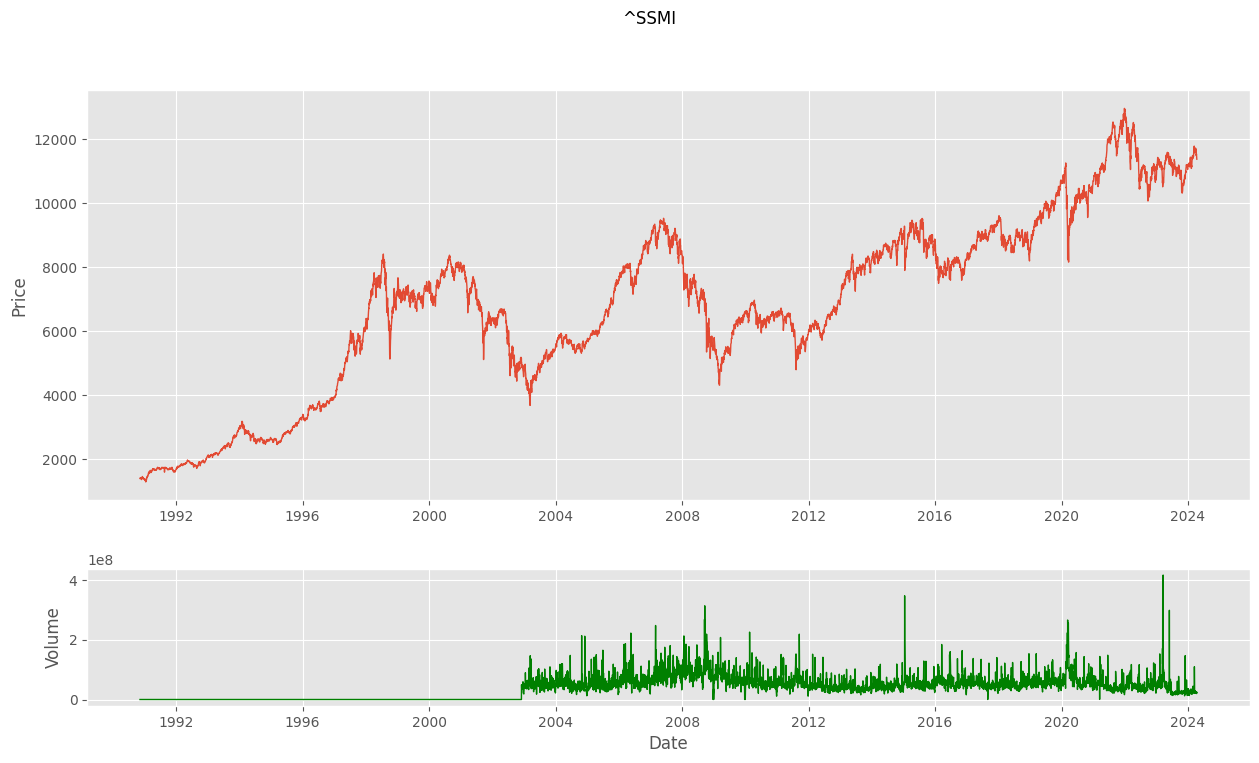

In [9]:
# Plot the adjusted close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [10]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [11]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

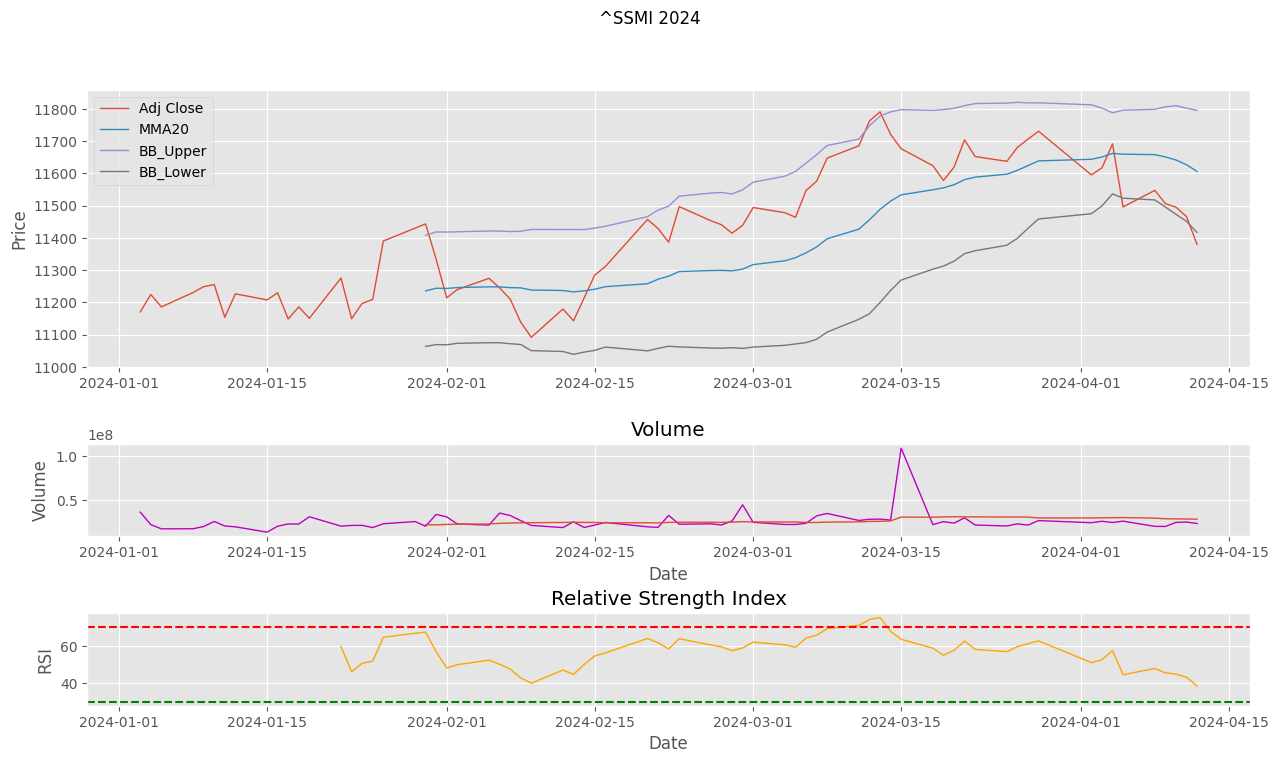

In [12]:
# Plot the adjusted close price
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [13]:
# Plot the adjusted close price
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [14]:
stock_ticker.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2024-03-28,11732.830078,11740.679688,11687.139648,11730.429688,11730.429688,26562000,11638.411475,11818.388448,11458.434501,62.599266,0.211177
2024-04-02,11730.429688,11762.559570,11582.000000,11595.000000,11595.000000,24187800,11643.465479,11812.257921,11474.673036,50.932749,-1.154516
2024-04-03,11613.240234,11629.429688,11582.330078,11616.870117,11616.870117,25809300,11650.418994,11801.911313,11498.926676,52.473147,0.188617
2024-04-04,11633.879883,11693.570312,11616.459961,11691.129883,11691.129883,24405100,11661.788477,11787.464829,11536.112125,57.367236,0.639241
2024-04-05,11543.309570,11548.309570,11480.870117,11495.790039,11495.790039,25943200,11659.254492,11795.710619,11522.798365,44.411775,-1.670838
2024-04-08,11501.709961,11561.379883,11487.410156,11547.139648,11547.139648,19994600,11657.842969,11798.267094,11517.418844,47.752100,0.446682
2024-04-09,11525.030273,11577.759766,11486.669922,11506.040039,11506.040039,19861400,11650.787988,11806.048278,11495.527698,45.400560,-0.355929
2024-04-10,11558.889648,11559.629883,11404.389648,11495.209961,11495.209961,24495300,11641.288965,11809.660669,11472.917261,44.774851,-0.094125
2024-04-11,11492.070312,11537.570312,11427.480469,11465.740234,11465.740234,24894100,11626.473486,11801.738635,11451.208337,43.036730,-0.256365


  0%|          | 0/21 [00:00<?, ?it/s]

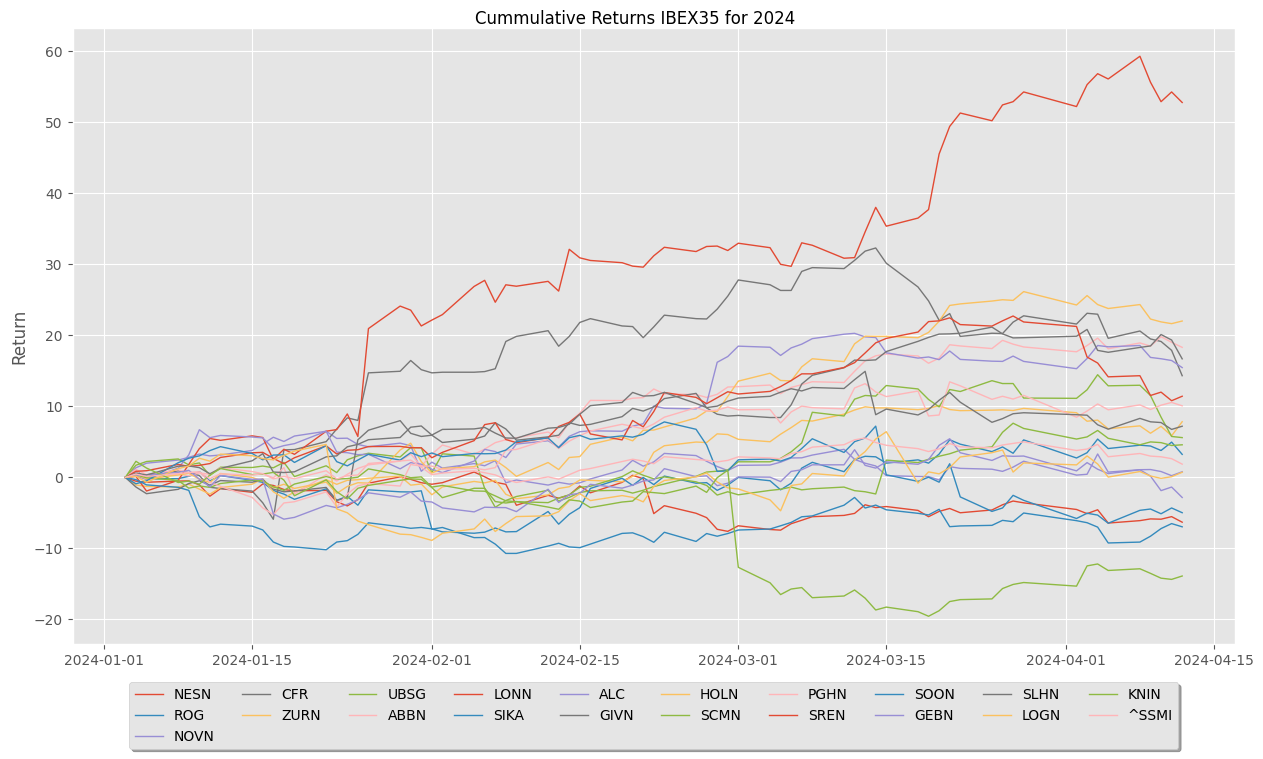

In [15]:
# Plot Cummulative Returns
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [16]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/21 [00:00<?, ?it/s]

In [17]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/21 [00:00<?, ?it/s]

,Ticker,Name,Date,Cummulative_Return
0,LONN.SW,Lonza Group AG,2024-04-12,52.813479
1,HOLN.SW,Holcim Limited,2024-04-12,22.033377
2,ABBN.SW,ABB Ltd,2024-04-12,18.323776
3,GIVN.SW,Givaudan SA,2024-04-12,16.704624
4,ALC.SW,Alcon Inc,2024-04-12,15.473230
5,CFR.SW,Compagnie Financière Richemont SA,2024-04-12,14.330360
6,SREN.SW,Swiss Reinsurance Company Ltd,2024-04-12,11.438180
7,PGHN.SW,Partners Group Holding AG,2024-04-12,10.090948
8,ZURN.SW,Zurich Insurance Group AG,2024-04-12,7.849034
9,SLHN.SW,Swiss Life Holding AG,2024-04-12,7.214357


In [18]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).head(30)

,Ticker,Name,Date,Cummulative_Return
0,LONN.SW,Lonza Group AG,2024-04-12,52.813479
1,HOLN.SW,Holcim Limited,2024-04-12,22.033377
2,ABBN.SW,ABB Ltd,2024-04-12,18.323776
3,GIVN.SW,Givaudan SA,2024-04-12,16.704624
4,ALC.SW,Alcon Inc,2024-04-12,15.473230
5,CFR.SW,Compagnie Financière Richemont SA,2024-04-12,14.330360
6,SREN.SW,Swiss Reinsurance Company Ltd,2024-04-12,11.438180
7,PGHN.SW,Partners Group Holding AG,2024-04-12,10.090948
8,ZURN.SW,Zurich Insurance Group AG,2024-04-12,7.849034
9,SLHN.SW,Swiss Life Holding AG,2024-04-12,7.214357
